In [1]:
import nltk

In [3]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
messages

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Cl

In [5]:
len(messages)

5574

In [6]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
for messagem_number, message in enumerate(messages[:15]):
    print(messagem_number, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [9]:
import pandas as pd
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [12]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
messages['lenght'] = messages['message'].apply(len)

In [18]:
messages.head()

,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


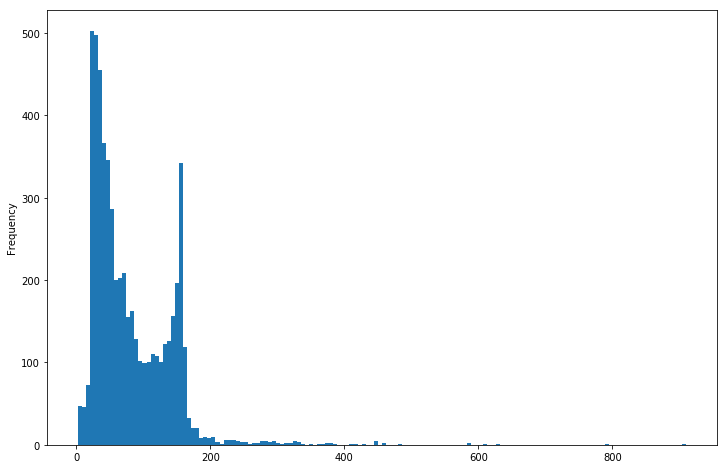

In [20]:
plt.figure(figsize=(12,8))
messages['lenght'].plot(kind='hist', bins=150)

In [21]:
messages.lenght.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: lenght, dtype: float64

In [22]:
messages[messages['lenght'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f316bfd9278>,
      dtype=object)

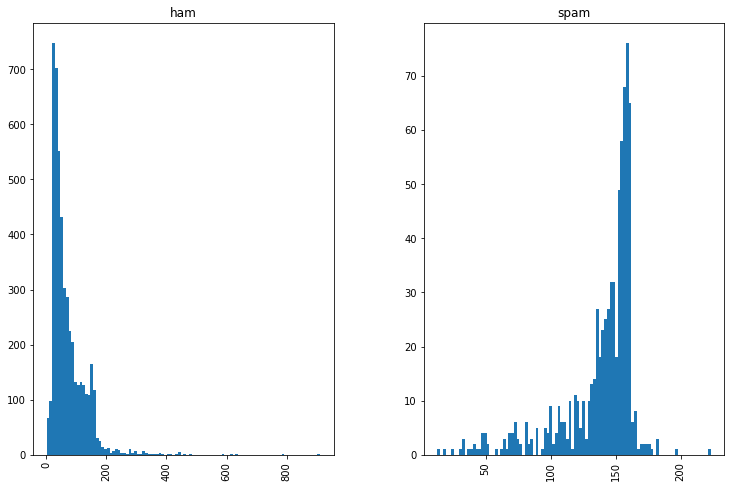

In [24]:
#plt.figure(figsize=(12,8))
messages.hist(column='lenght', bins=100, by='label', figsize=(12,8))

## Pré Processamento de texto

In [41]:
#eliminando a pontuação

import string

mess = 'Sample message! Notice: it has punctuation.'

# Retira pontuações
nopunc = [char for char in mess if char not in string.punctuation]

# Junta novamente os caracteres para formar um string e não uma lista
nopunc = ''.join(nopunc)

In [42]:
nopunc

'Sample message Notice it has punctuation'

In [43]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [44]:
from nltk.corpus import stopwords

In [45]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [47]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [49]:
def text_process(mess):
    # Retira pontuações
    nopunc = [char for char in mess if char not in string.punctuation]

    # Junta novamente os caracteres para formar um string e não uma lista
    nopunc = ''.join(nopunc)
    
    #Remover stopwords
    sms = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    return sms

In [50]:
messages.head()

,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [52]:
# Verifica para ver se está funcionando
messages['message'].head(5).apply(text_processcess)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Vetorização

Etapas:
* Contar quantas vezes ocorre uma palavra em cada mensagem (conhecida como freqüência de termo)

* Pesar as contagens, de modo que tokens freqüentes recebem menor peso (freqüência inversa do documento)

* Normalizar os vetores para o comprimento da unidade, para abstrair do comprimento do texto original (norma L2)

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])
# colocar numeração de quantas vezes determinada palavras aparece

In [62]:
len(bow_transformer.vocabulary_)

11425

In [63]:
message4 = messages['message'][3]

In [64]:
message4

'U dun say so early hor... U c already then say...'

In [65]:
bow4 = bow_transformer.transform([message4])

In [67]:
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [68]:
bow_transformer.get_feature_names()[4068]

'U'

In [70]:
bow_transformer.get_feature_names()[4629]

'already'

In [72]:
messages_bow = bow_transformer.transform(messages['message'])

In [73]:
messages_bow.shape

(5572, 11425)

In [74]:
messages_bow.nnz

50548

In [76]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [80]:
from sklearn.feature_extraction.text import TfidfTransformer

In [81]:
tdidf_transformer = TfidfTransformer()

In [82]:
tdidf_transformer = tdidf_transformer.fit(messages_bow)

In [83]:
tfidf4 = tdidf_transformer.transform(bow4)

In [85]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [86]:
print(tdidf_transformer.idf_[bow_transformer.vocabulary_['university']])

8.527076498901426


## Treinando um modelo

In [87]:
from sklearn.naive_bayes import MultinomialNB

In [88]:
messages_tfidf =  tdidf_transformer.transform(messages_bow)

In [89]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [91]:
print('Predito:', spam_detect_model.predict(tfidf4[0]))
print('Esperado:', messages['label'][3])

Predito: ['ham']
Esperado: ham


## Divisão treino-teste

In [93]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

In [96]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # Tokeniza as mensagens
    ('tfidf', TfidfTransformer()),  # Faz a transformação em TF-IDF
    ('classifier', MultinomialNB()),  # Define a classe que realizará nossa classificação.
])

## Pipeline de dados

In [97]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x7f316c84d2f0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=No...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [98]:
pred = pipeline.predict(msg_test)

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

In [103]:
print(classification_report(pred, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1014
        spam       0.71      1.00      0.83       101

   micro avg       0.96      0.96      0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.97      1115

